<a href="https://colab.research.google.com/github/TrongHvDev/AI/blob/main/BaoCaoGiuaKy/Money_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
folder = '/content/drive/MyDrive/AI/money/money'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('5000'):
    output = 1
  if file.startswith('10000'):
    output = 2
  if file.startswith('20.000'):
    output = 3
  if file.startswith('50.000'):
    output = 4
  if file.startswith('100.000'):
    output = 5
  if file.startswith('200.000'):
    output = 6
  if file.startswith('500.000'):
    output = 7
  photo = load_img(folder + '/' + file, target_size=(90, 120))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI/Backup/Money_photos.npy', photos)
save('/content/drive/MyDrive/AI/Backup/Money_labels.npy', labels)

(220, 90, 120, 3) (220,)


In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
  from keras.preprocessing.image import ImageDataGenerator

# Load data
photos = np.load('/content/drive/MyDrive/AI/Backup/Money_photos.npy')
labels = np.load('/content/drive/MyDrive/AI/Backup/Money_labels.npy')

# Preprocess data
photos = photos.astype('float32') / 255.0
labels = to_categorical(labels)

# Split data into train and test sets
split_index = int(0.1 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(90, 120, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# ANN model
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(8, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_x)

# Train model
history = model.fit(datagen.flow(train_x, train_y, batch_size=32),
                    epochs=100, validation_data=(test_x, test_y))

# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)


Test loss: 0.16372738778591156
Test accunacy 0.9545454382896423


Text(0.5, 1.0, 'Training & Testing Accuracy')

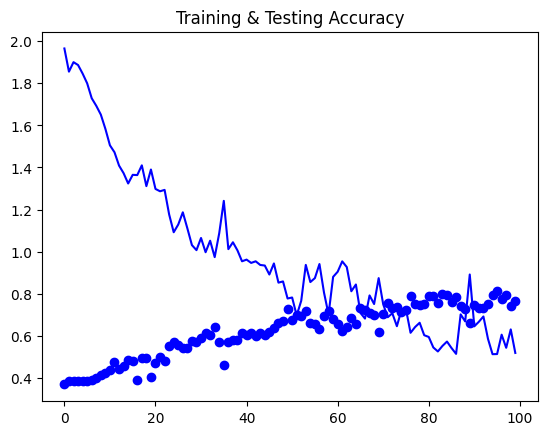

In [ ]:
import matplotlib.pyplot as plt
eval = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', eval[0])
print('Test accunacy', eval[1])
accuracy = history.history['accuracy']S
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, loss, 'b', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')

In [ ]:
model.save('/content/drive/MyDrive/AI/Backup/Money.h5')

1/1 [==============================] - 0s 78ms/step
200k


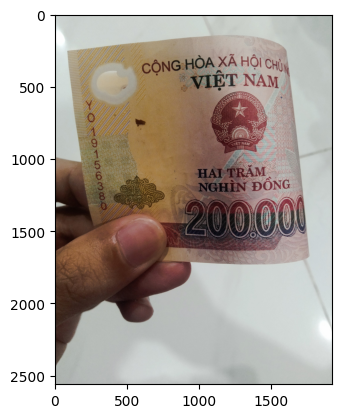

1/1 [==============================] - 0s 19ms/step
200k


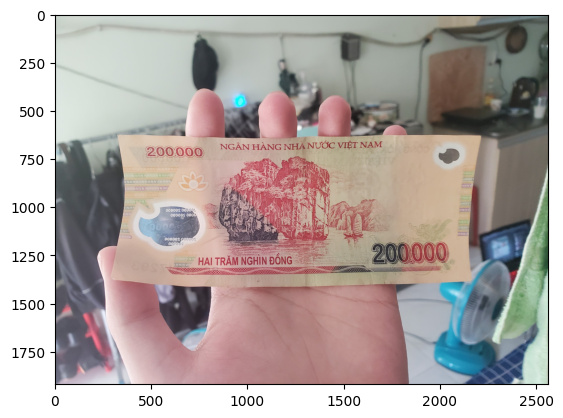

1/1 [==============================] - 0s 19ms/step
500k


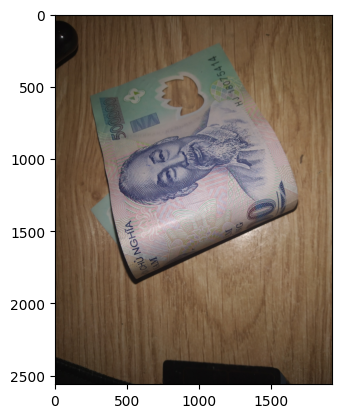

1/1 [==============================] - 0s 19ms/step
5k


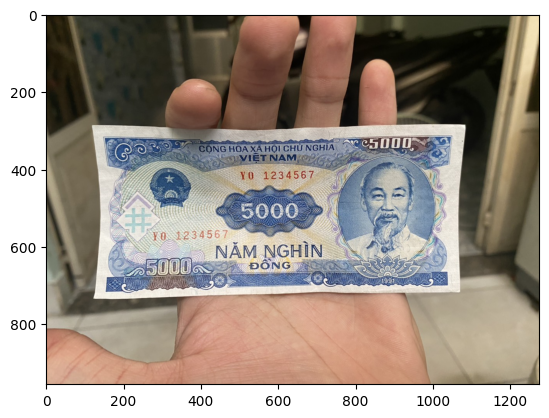

1/1 [==============================] - 0s 22ms/step
500k


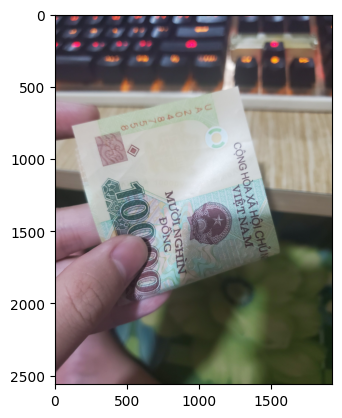

In [ ]:
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
from keras.models import load_model
model1 = load_model('/content/drive/MyDrive/AI/Backup/Money.h5')
folder = '/content/drive/MyDrive/AI/Money_test'
for file in listdir(folder):
  photos = load_img(folder + '/' +  file)
  plt.imshow(photos)
  photo = load_img(folder + '/' +  file, target_size = (90, 120))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model1.predict(photo).argmax())
  class_name=['5k', '10k', '20k', '50k', '100k', '200k', '500k']
  print(class_name[result - 1])
  plt.show()